 **Universidade Federal do Rio de Janeiro – UFRJ**
 
 **EPQB – Programa de Pós-Graduação em Engenharia de Processos Químicos e Bioquímicos**
 
 **EQE – 720 Planejamento de Experimentos e Análise Estatística de Dados**

 **TRABALHO 2 - ANÁLISE MULTIVARIADA DE JUNTAS DE SOBREPOSIÇÃO SIMPLES PRODUZIDAS EM LARGA ESCALA COLADAS COM ADESIVOS**

 **Multivariate analysis of high through-put adhesively bonded single lap joints**

  Autor: Gustavo Luís Rodrigues Caldas 

# Objetivos

O objetivo deste trabalho é analisar as correlações latentes entre as múltiplas variáveis de processo de juntas de sobreposição simples  coladas com adesivos (tipo de adesivo, espessura do aderente, espessura da linha de ligação, pré-tratamento, transbordo sobre o filete) e a resistência efetiva da junta por meio da técnica de análise de componentes principais (PCA). 


# Introdução

Em juntas de adesivo sobrepostas,a resistência efetiva é função de diversos parâmetros, entre eles o tipo de pré-tratamento da superfície, que influencia as forças de coesão e adesão nas juntas devido à introdução de grupos ligantes; as dimensões da junta: a espessura da linha de ligação para adesivos estruturais; a espessura do próprio aderente (o substrato); a presença de transbordo do filete e natualmente a área de adesão e o próprio adesivo. 

Essa  dinâmica complexa entre as variáveis sugere que ao variar todas ao mesmo tempo, o uso de técnicas de análise multivariadas aliada ao planejamento de experimentos é uma ferramenta para a obtenção de correlações entre os parâmetros do processo. 

![image info](https://ars.els-cdn.com/content/image/1-s2.0-S0143749618302574-gr1.jpg)

A técnica de análise de componentes principais (ACP) é uma método de redução da dimensionalidade dos dados por meio da transformação linear das variáveis originais em variáveis latentes. Este método pertence à família de técnicas interdependentes (ou não-supervisionada), pois não estamos interessados em obter inferências (causalidades) entre as variáveis (dependentes e independentes) e sim na estrutura entre elas (correlação). 

A técnica consiste primeiro na padronização dos dados em termos da média e do desvio-padrão das amostras, seguido da aplicação da diagonalização da matriz de correlação (onde obtém-se os vetores próprios - ortonormais entre si - e os seus respectivos valores próprios) de forma a maximizar a variância no primeiro componente obtido. Este novo auto-espaço possui variáveis que são não-correlacionadas entre si, já que a matriz de covariância é nula fora da diagonal principal, que é onde está contida os autovalores. 

Em geral, a vantagem dessa técnica reside na ausência de hipóteses restritivas aos dados, tais como normalidade, a única hipõtese acerca é a presença de redundância (teste de esfericidade de Bartlett), que é pouco usada, pois a pouca utilidade do ACP nesses casos seria evidente.   

# Materiais e Métodos

A variável de interesse é a resistência à tração cisalhante (S), que é obtida pela razão entre a carga de tração imposta ao material dividido pela área da junta. A área da junta foi mantida constante ao longo de todos os experimentos. Entre as inúmeras variáveis a serem analisadas, selecionou-se como variáveis ativas na análise: a espessura do aderente - h_adherend (2 níveis), a espessura da linha de ligação - h_bondline, deformação do material até a falha (d_failure) e a própria variável S. Como variáveis suplementares contínuas temos o tamanho do espaçador (h_spacer) e como variáveis suplementares categóricas temos: o tipo de adesivo a ser usado (2 níveis), o pré-tratamento (2 níveis), modo de falha (2 níveis) e o filete (2 níveis). Detalhes de preparação das amostras podem ser encontrados no artigo de referência.  

In [46]:
head(df)

MSAT ID,Operator,Date test performed,Valid test,Used in Summary,Lot ID,Adhesive,h_adherend,h_bondline,h_spacer,...,Extension at Max Load (m),Area under the curve to max load - Riemann Sums (N.mm),d_failure,Total under the curve - Riemann Sums (N.mm),Adhesive underfilled,Adhesive fill quality,Failure,Test frame,Load cell,Load cell calibration date
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
20120617,SEAP Student 1,2456134,Yes,Yes,CEP100-ARL-2012-RT-02,CEP100-epoxy,0.00114,1.25e-04,0.000127,...,0.001180,2490,0.001180,2500,No,Very good,Adhesive,1,1,2455516
20120618,SEAP Student 1,2456134,Yes,Yes,CEP100-ARL-2012-RT-02,CEP100-epoxy,0.00114,1.12e-04,0.000127,...,0.001270,2080,0.001270,2090,No,Very good,Adhesive,1,1,2455516
20120619,SEAP Student 1,2456134,No,No,CEP100-ARL-2012-RT-02,CEP100-epoxy,0.00114,2.80e-05,0.000127,...,0.000709,370,0.000789,375,No,Very good,Adhesive,1,1,2455516
20120620,SEAP Student 1,2456134,Yes,Yes,CEP100-ARL-2012-RT-02,CEP100-epoxy,0.00114,6.93e-05,0.000127,...,0.001010,2050,0.001020,2060,No,Very good,Adhesive,1,1,2455516
20120621,SEAP Student 1,2456134,Yes,Yes,CEP100-ARL-2012-RT-02,CEP100-epoxy,0.00114,8.17e-05,0.000127,...,0.001120,1710,0.001130,1710,No,Very good,Adhesive,1,1,2455516
20120622,SEAP Student 1,2456134,Yes,Yes,CEP100-ARL-2012-RT-02,CEP100-epoxy,0.00114,2.73e-05,0.000127,...,0.001660,4360,0.001670,4380,No,Very good,Adhesive,1,1,2455516


Para a ACP, primeiramente procedeu-se com os 1203 dados brutos reportados, depois o conjunto de dados foi reduzido a 711, filtrados segundo critérios de inspeção da qualidade de preenchimento da junta e do filete filtrados, nesse caso, procedeu-se a outro ACP. Esta metodologia é diferente do seguido pelo autor, em que usou o mesmo ACP para dados filtrados e não-filtrados. 

# Resultados e discussão

## Dados não-filtrados

A matriz de correlação mostra se a análise de componentes principais é útil. Repare que os valores de correlação fora da diagonal principal são não-nulas, o que justifica o uso de ACP- 


Dentre as variáveis das variáveis contínuas escolhidas, é fácil de se verificar que a espessura do espaçador está fortemente correlacionada com a espessura de aderência. Isso já era de se esperar, pois o primeiro determina o segundo. Caso contrário isto significaria que o experimento foi feito de forma incorreta. Por isso, além de não ser uma variável relevante ao processo, ela foi considerara como suplementar e não foi usada na análise. 

In [47]:
corr

,h_adherend,h_bondline,S,d_failure,h_spacer
h_adherend,1.00,-0.10,0.25,0.03,0.00
h_bondline,-0.10,1.00,-0.28,0.13,0.95
S,0.25,-0.28,1.00,0.38,-0.25
d_failure,0.03,0.13,0.38,1.00,0.15
h_spacer,0.00,0.95,-0.25,0.15,1.00


A resistência à tração é negativamente correlacionada à espessura de ligação e possui certa correlação com a deformação até a ruptura e a espessura do aderente. Uma forma visual de ilustrar a matriz de correlação está abaixo. Com ACP, espera-se descobrir mais informações interrelacionais das variáveis. 

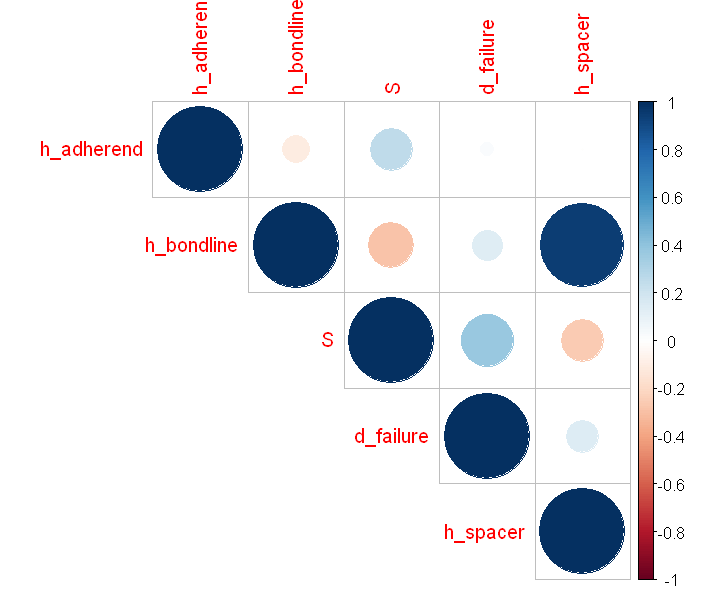

In [48]:
corrplot(cor(adhesive_new), method = "circle", type="upper")

A primeira etapa do ACP (o procedimento de padronização e cálculos já foi automatizado pelo pacote) envolve a escolha do número de componentes principais a serem retidos para análise. A figura chamada "scree plot" mostra o percentual da variância explicada por cada componente principal (CP).

O primeiro componente principal explica 38.2 % da variância dos dados, a variância acumulada dos dois primeiros componentes principais é de 66.9 %, esse será o ponto de corte. Apesar de mais de 30% de informação ser perdida, o terceiro componente principal tem valor próprio inferior a um, que é menor do que se as variáveis originais fossem usadas, justificando o corte.

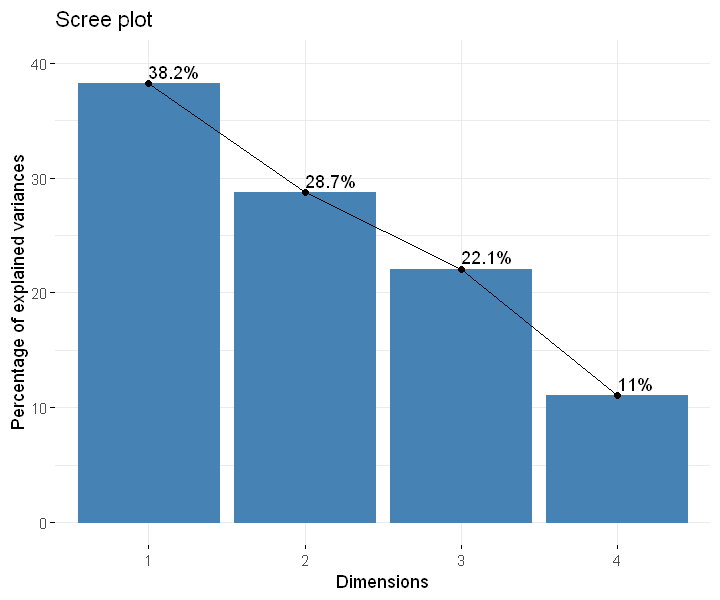

In [49]:
Fig1

In [50]:
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,1.5279970,38.19993,38.19993
Dim.2,1.1481249,28.70312,66.90305
Dim.3,0.8829230,22.07308,88.97612
Dim.4,0.4409551,11.02388,100.00000


A figura abaixo mostra as communalities (cossenos ao quadrados), que indica o quanto de variância de cada variável está contido em cada componente principal. Pode-se verificar que boa parte da variância da variável resistência a tração pode ser explicada pelo primeiro componente principal (é a que mais contribui também para CP1). Em geral, as variáveis tem sua variáveis bem explicadas pelos dois primeiros componentes principais, à exceção de h_adherend, que tem sua variância explicada pelo em sua maior parte pelo componente principal 3.  

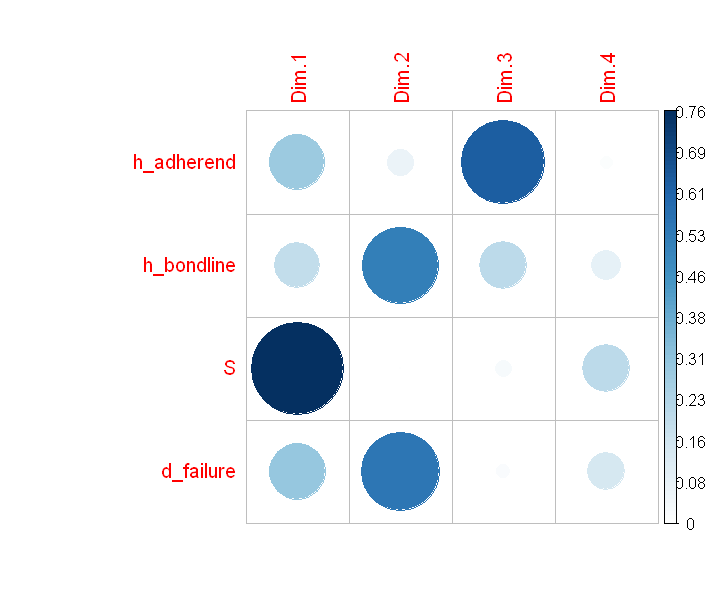

In [51]:
corrplot(res.pca$var$cos2, is.corr=FALSE)
#fviz_cos2(res.pca, choice = "var", axes = 1:2)

In [112]:
round(eigenVectors,2)

,PC1,PC2,PC3,PC4
h_adherend,0.43,-0.25,0.84,-0.20
h_bondline,-0.35,0.68,0.48,0.44
S,0.71,0.06,-0.18,0.68
d_failure,0.44,0.69,-0.15,-0.55


A figura mostra abaixo mostra a projeção das variáveis através dos seus loadings e também a qualidade da representação por meio do gradiente dos communalities, repare como há perda de informação para espessura do aderente, com apenas 40% da variância sendo explicada pelos dois primeiros componentes principais. Conforme já foi antecipado, pode-se verificar que a variável h_spacer está fortemente correlacionada com h_bondline. A análise das demais será feita na seção de dados filtrados. 

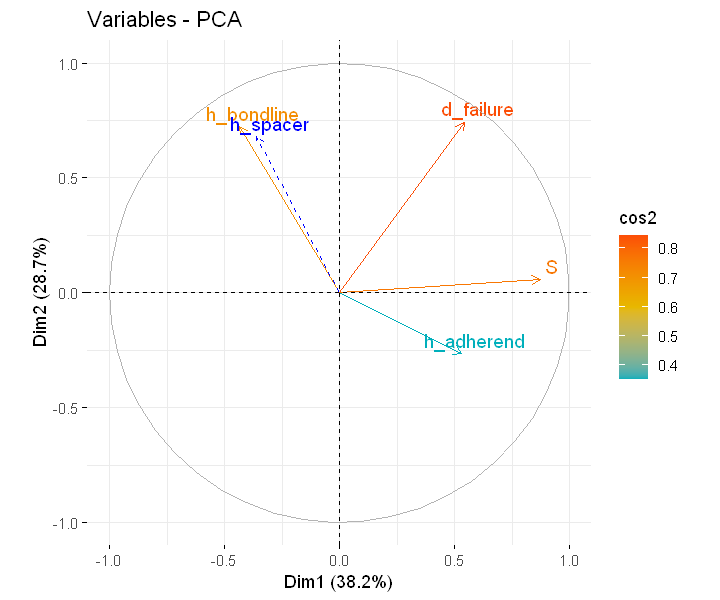

In [53]:
Fig2

Como o autor fez uma seleção das amostras com base na qualidade da aplicação da junta e do filete, foi investigada neste trabalho se as amostras com qualidade inferior influenciam na análise dos resultados. A figura abaixo, aonde péssima/ruim/regular é tratada como verdadeiro e boa/muito boa como falso, mostra que a primeira está na direção oposta a resitência à tração, justificando a sua exclusão e o conjunto de dados a partir de agora permanece com apenas adesivos de qualidade muito boa/boa

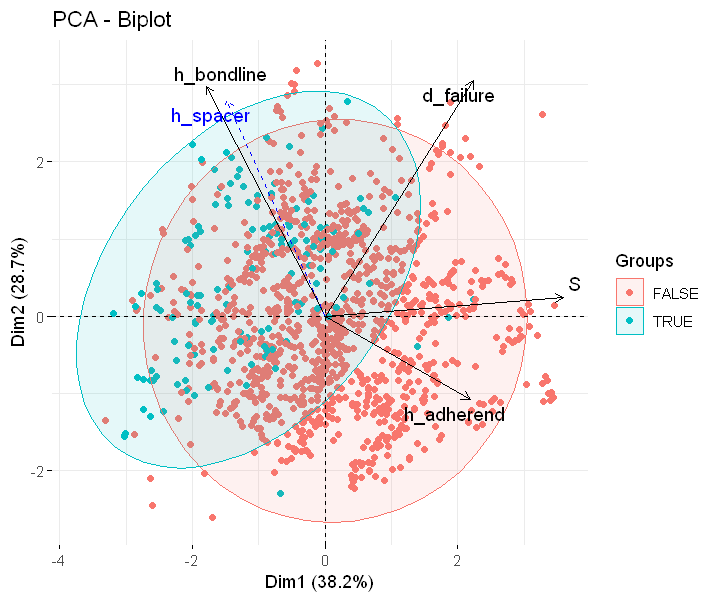

In [54]:
Fig3

## Dados filtrados

Diferentemente do que foi feito pelo autor, escolheu-se fazer a análise dos dados filtrados usando outra análise de componentes principais ao invés de continuar com a mesma. Dessa forma, o conjunto de dados se reduziu de 1204 para 749 (redução de 37.7%). A justificativa para isso é que uma análise de componentes principais de um subconjunto pode revelar informações de forma mais evidente que o conjunto original, especialmente se as variáveis excluídas impactam a variável de interesse. Novamente, o scree plot, a tabela de autovalores e o gráfico de communalities dessa nova análise de componentes principais são mostrados. 

Nota que um deslocamento da variância para o segundo componente principal em detrimento de CP1 e CP3. Entretanto, a variância acumulada nos dois componentes principais permanece basicamente a mesma, por isso o corte nos primeiros dois componentes principais é feito. Como no caso anterior, CP3 (a terceira dimensão retém a maior parte da variância da espessura do aderente, mas também tem um leve aumento da variância da espessura de aderência. 

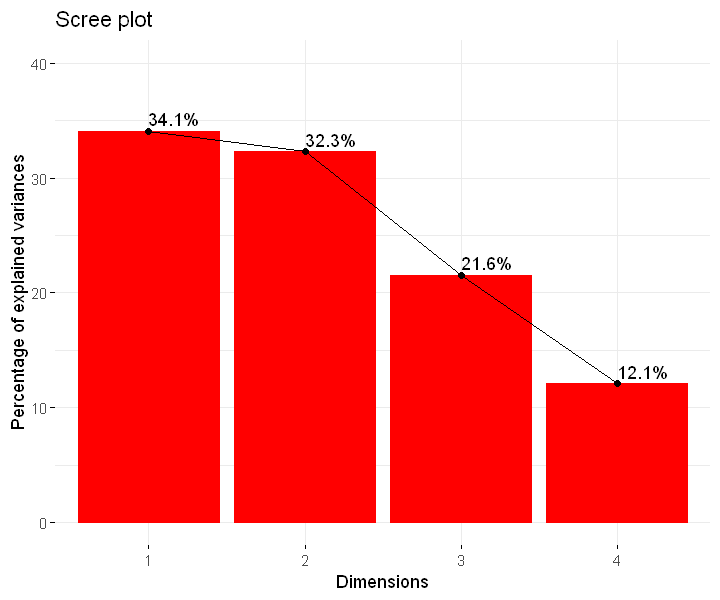

In [55]:
Fig5

In [56]:
eig.val2

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,1.3627675,34.06919,34.06919
Dim.2,1.2919811,32.29953,66.36872
Dim.3,0.8621014,21.55254,87.92125
Dim.4,0.4831499,12.07875,100.00000


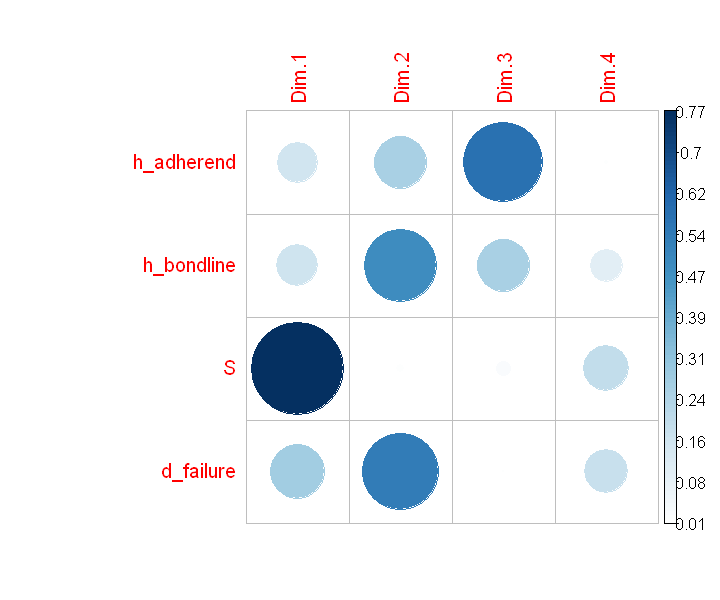

In [57]:
corrplot(res_new.pca$var$cos2, is.corr=FALSE)

A projeção das variáveis no gráfico de PCA mostra houve um pequena rotação em relação ao caso não filtrado. Como já discutido, pode-se verificar que boa parte do primeiro componente principal está explicado pela resistência à tração cisalhante de sobreposição, a deformação é influenciada tanto pelo CP1 quanto por CP2. Estas duas variáveis estão bem representadas conforme os gradientes de quadrados de cosseno. A espessura do aderente continua subrepresentado pelos dois CPs, porém em escala maior que o caso anterior. Para a espessura de aderência, houve um pequeno decréscimo na sua representação. 

Em relação a correlação das variáveis, é visível que: a espessura da linha de ligação minimiza a resistência à tração e reforça a deformação até a ruptura. Por outro lado, a espessura de aderência, em certo grau, minimiza a distensão até a ruptura (ao longo de CP2) e reforça a S, porém não de forma totalmente inversa, pois se fosse o caso, estariam em quadrantes diagonalmente opostos.

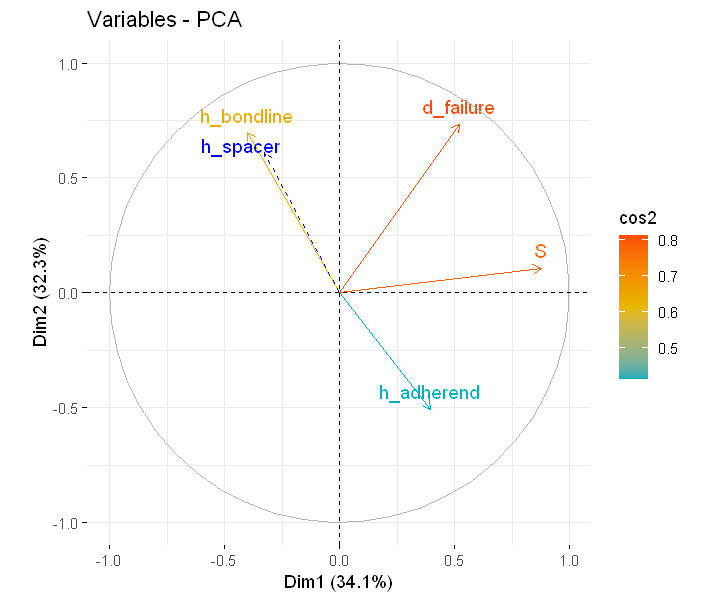

In [58]:
Fig6

Uma das variáveis qualitativas de interesse são os adesivos usados. Note que os casos de epóxi CEP100 está distribuído mais ao longo do primeiro eixo do que os indivíduos marcados como metacrilato SG300, que está bem distribuído ao longo do segundo eixo. Portanto, o epóxi tem sua resistência à tração variando mais do que o metacrilato. Isso pode confirmado através dos gráficos em caixa. Se há diferenças entre as médias, somente após o uso de teste de hipóteses que isso poderá ser respondido. Como há varios fatores afetando, seria mais recomendável usar análise da variância do que um teste de hipótese de duas amostras. 

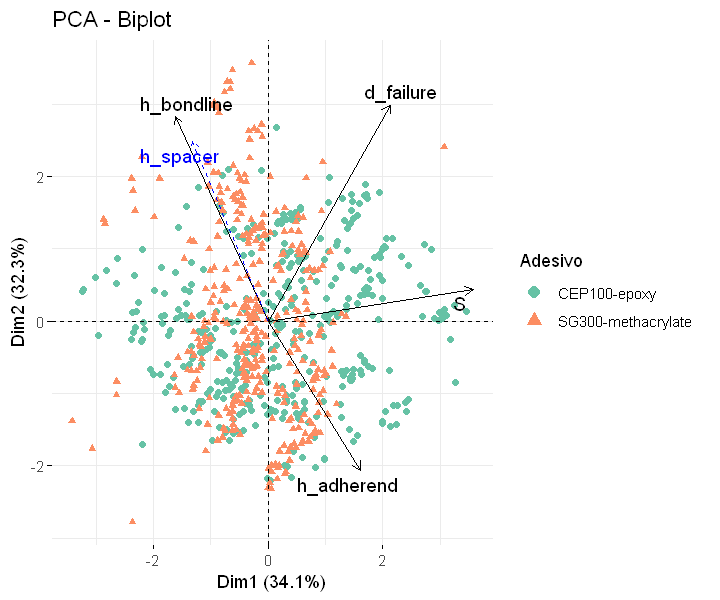

In [59]:
Fig7

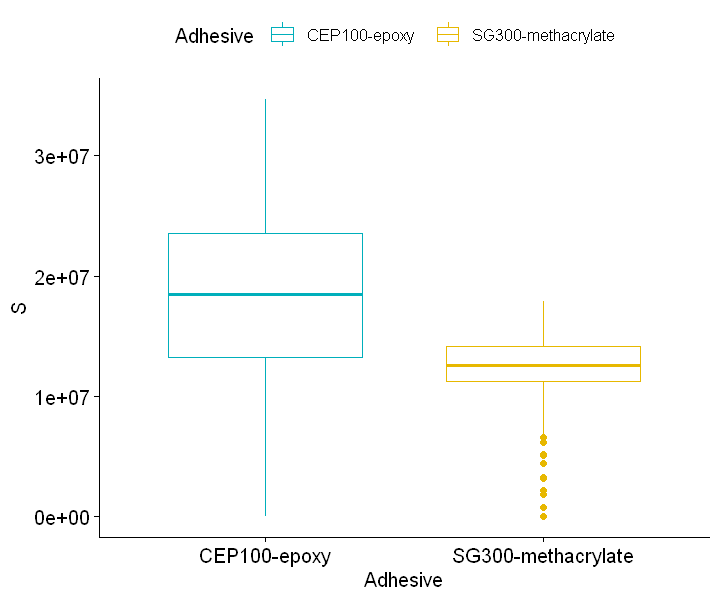

In [60]:
caixa

De forma a interpretar os dados em termos de cada produto, cada análise será feita separadamente para cada produto.

## Metacrilato

Para o metacrilato, é possível supor que para a variável S: o pré-tratamento nem a espessura do filete não parecem influenciar significativamente, os melhores valores são encontrados com espaçadores intermediários (0.381 mm e 0.762 mm) e maior espessura de aderente (2.29 mm). Mesmo que isso possa vir a ser verdade, esse tipo de afirmação só poderia ser construído a partir de análise de variâncias, pois com o método ACP é não é capaz de resolver tais perguntas. O autor do artigo usou o método para chegar a um arranjo ótimo, mas isso só poderia ser feito a partir de planejamentos com otimização.

Valores mais altos de h_adherend estão logicamente posicionados na direção desse vetor assim como para o caso de h_spacer.  

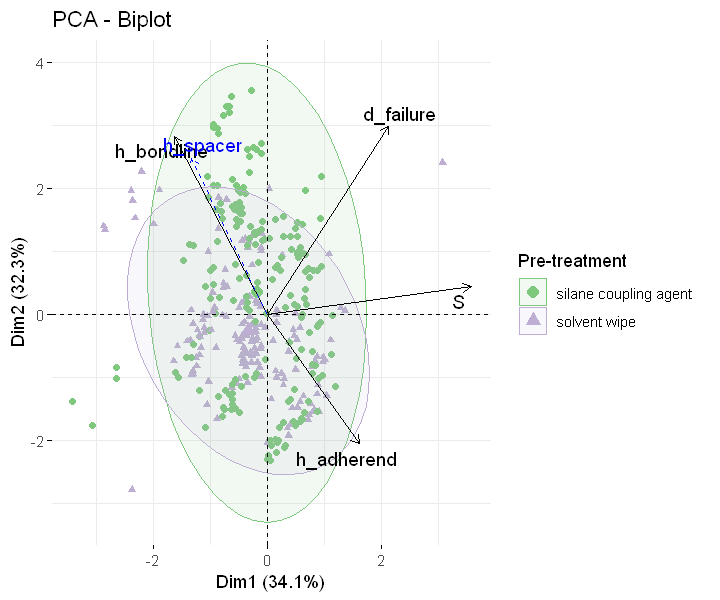

In [61]:
Fig8

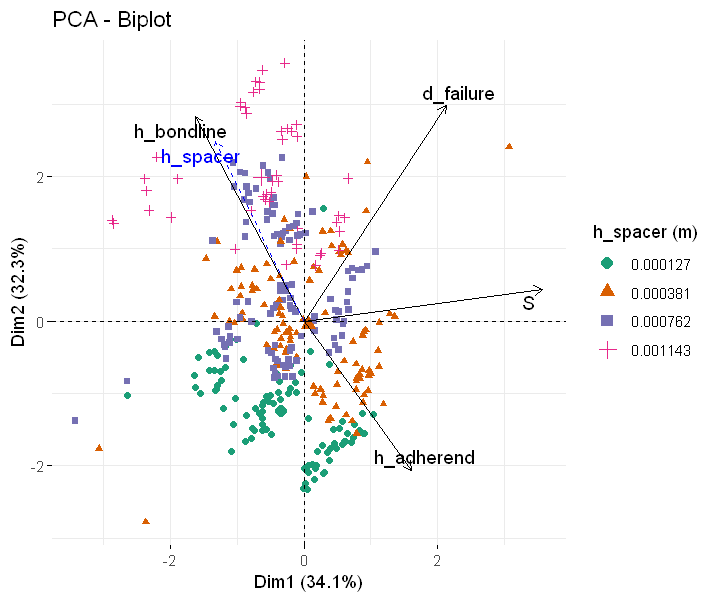

In [62]:
Fig9

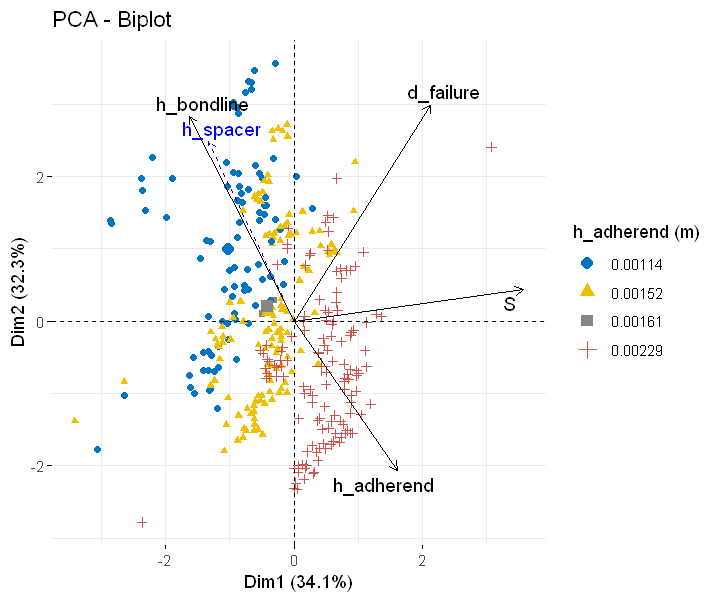

In [63]:
Fig10

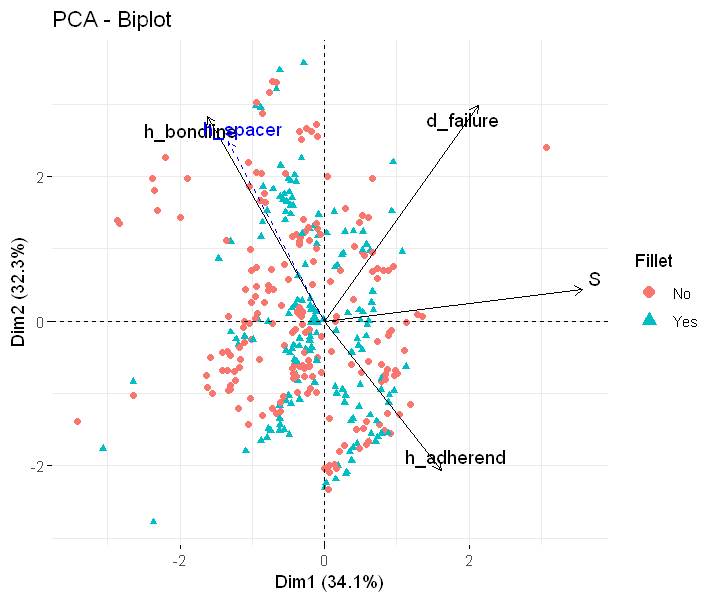

In [64]:
Fig11

## Epóxi

Para o adesivo epóxi, o tipo de pré-tratamento utilizado parece ter uma influência mais clara, em que os dados são nitidamente separados, logo essa combinação está em quadrante oposto ao da resistência a tração. Para a variável S, maiores espessuras de espaçadores estão negativamente relacionadas e a espessura do aderente parece reforçar a resistência a tração. O uso de filete parece afeter indistintivamente as duas variáveis. 

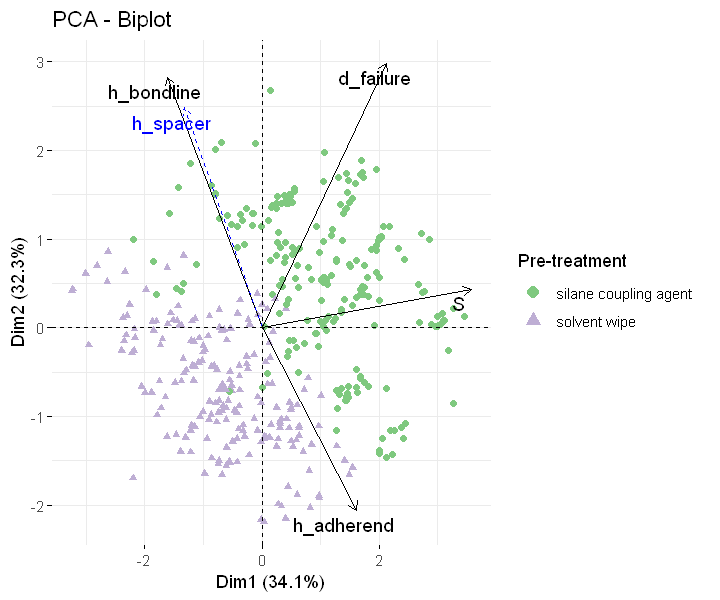

In [65]:
Fig12

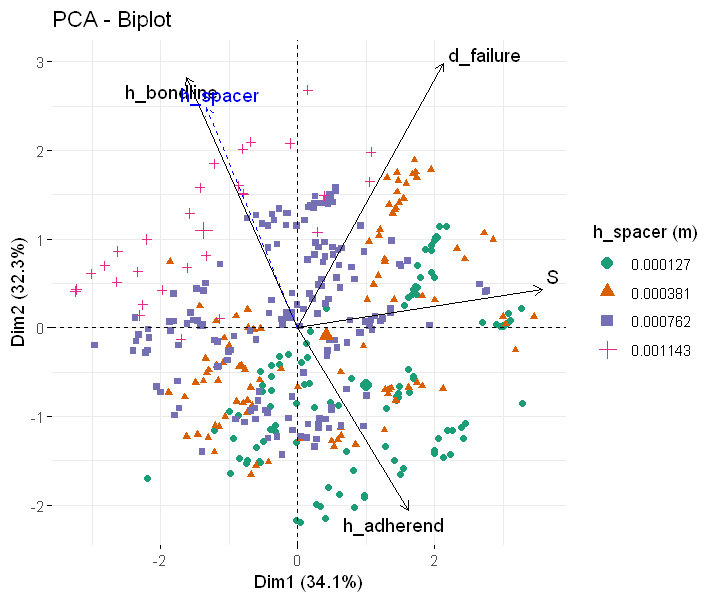

In [66]:
Fig13

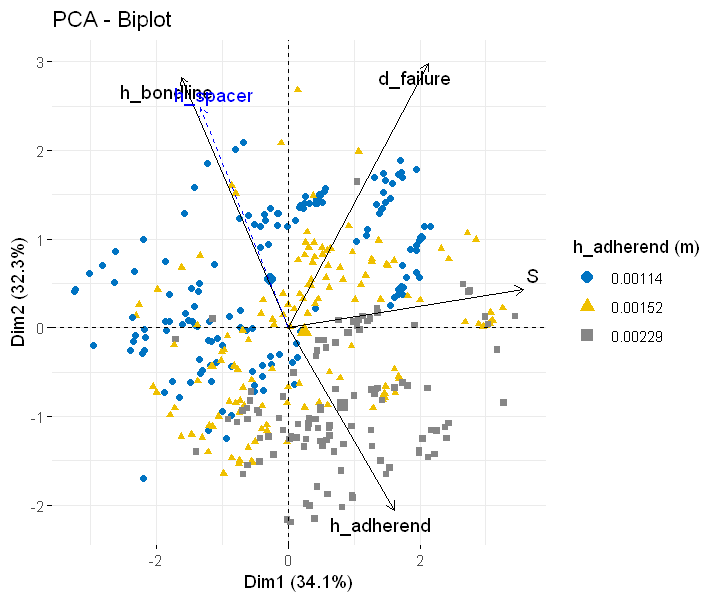

In [67]:
Fig14

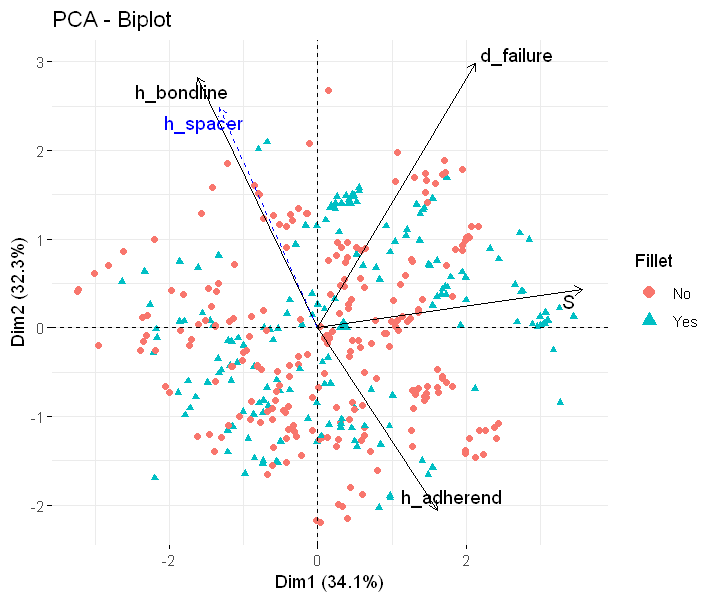

In [68]:
Fig15

# Conclusão

# Apêndice - Códigos

In [69]:
#Chamando a biblioteca
library(ggplot2)
library(FactoMineR)
library(factoextra)
library(ggpubr)
library(RColorBrewer)
library(readxl)
library(corrplot)
library(dplyr)
# Tamanho das figuras:
options(repr.plot.width=6, repr.plot.height=5)

## Dados não-filtrados

In [70]:
#Importando os dados
DOE_and_metadata_rev_1_0 <- read_excel("C:/Users/Startklar/Downloads/DOE and metadata_rev 1.0.xlsx",sheet = "MSAT Output (SI Consistent)",range = "A1:AI1203")

In [71]:
#Visualizando os dados
head(DOE_and_metadata_rev_1_0)

MSAT ID,Operator,Date test performed,Valid test,Used in Summary,Lot ID,Material ID,Lap Shear joint substrate aluminum thickness (m),Average thickness of the adhesive layer (m),Spacer shim thickness (m),...,Extension at Max Load (m),Area under the curve to max load - Riemann Sums (N.mm),Extension at complete failure (m),Total under the curve - Riemann Sums (N.mm),Adhesive underfilled,Adhesive fill quality,Mode-of-failure,Test frame,Load cell,Load cell calibration date
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
20120617,SEAP Student 1,2456134,Yes,Yes,CEP100-ARL-2012-RT-02,CEP100-epoxy,0.00114,1.25e-04,0.000127,...,0.001180,2490,0.001180,2500,No,Very good,Adhesive,1,1,2455516
20120618,SEAP Student 1,2456134,Yes,Yes,CEP100-ARL-2012-RT-02,CEP100-epoxy,0.00114,1.12e-04,0.000127,...,0.001270,2080,0.001270,2090,No,Very good,Adhesive,1,1,2455516
20120619,SEAP Student 1,2456134,No,No,CEP100-ARL-2012-RT-02,CEP100-epoxy,0.00114,2.80e-05,0.000127,...,0.000709,370,0.000789,375,No,Very good,Adhesive,1,1,2455516
20120620,SEAP Student 1,2456134,Yes,Yes,CEP100-ARL-2012-RT-02,CEP100-epoxy,0.00114,6.93e-05,0.000127,...,0.001010,2050,0.001020,2060,No,Very good,Adhesive,1,1,2455516
20120621,SEAP Student 1,2456134,Yes,Yes,CEP100-ARL-2012-RT-02,CEP100-epoxy,0.00114,8.17e-05,0.000127,...,0.001120,1710,0.001130,1710,No,Very good,Adhesive,1,1,2455516
20120622,SEAP Student 1,2456134,Yes,Yes,CEP100-ARL-2012-RT-02,CEP100-epoxy,0.00114,2.73e-05,0.000127,...,0.001660,4360,0.001670,4380,No,Very good,Adhesive,1,1,2455516


In [72]:
#Removendo dados faltantes da coluna "Average thickness of the adhesive layer (m)"
df <-DOE_and_metadata_rev_1_0[!is.na(DOE_and_metadata_rev_1_0$"Average thickness of the adhesive layer (m)"), ]

In [73]:
#Criando funções no R
renomear <- function(df){
    #Renomeando para ficar de acordo com o artigo
    df <- df  %>% 
     rename(
        h_adherend = "Lap Shear joint substrate aluminum thickness (m)", 
         h_bondline = "Average thickness of the adhesive layer (m)", S = "Max strength (Pa)",
         d_failure = "Extension at complete failure (m)", h_spacer = "Spacer shim thickness (m)", 
         Adhesive =  "Material ID", Failure = "Mode-of-failure", Pre_treatment = "Type of surface treatment")
    return(df)
    }
#Selecionando apenas variáveis quantitativas
novo <- function(df){
adhesive_new <- select(df,"h_adherend","h_bondline","S","d_failure","h_spacer"
                       #"Failure", "Pre_treatment",
                       #,"Adhesive","Fillet",
                      )
        return(adhesive_new)
}

In [74]:
#Modificando o dataframe segundo a função acima
df <- renomear(df)
adhesive_new <- novo(df)

In [75]:
#Estatística descritiva
X <- apply(adhesive_new,2,mean) #média
print(X,digits=3)
s <- apply(adhesive_new,2,sd) #Desvio-padrão
print(s,digits=3)

h_adherend h_bondline          S  d_failure   h_spacer 
  1.65e-03   5.95e-04   1.47e+07   1.87e-03   6.35e-04 
h_adherend h_bondline          S  d_failure   h_spacer 
  4.78e-04   3.39e-04   6.56e+06   6.98e-04   3.49e-04 


In [76]:
#Criando matriz de correlação
res <- cor(adhesive_new) # matriz de correlação
corr <- round(res, 2)

In [77]:
#Autovetores
adhesive_new2 <- select(adhesive_new,"h_adherend","h_bondline","S","d_failure")
#eigenVectors <- eigen(cor(adhesive_new2))$vectors #uma maneira alternativa de visualizar 
eigenVectors <- prcomp(adhesive_new2, scale = TRUE)$rotation

In [78]:
#Executando PCA em dados não-filtrados
res.pca <- PCA(adhesive_new, ncp = 4, graph = FALSE,
    quanti.sup=5, quali.sup=NULL)
#print(res.pca)

In [79]:
#Coordenadas das variáveis
res.pca$var$coord

,Dim.1,Dim.2,Dim.3,Dim.4
h_adherend,0.5311744,-0.26367716,0.7938977,-0.1343675
h_bondline,-0.4343279,0.72426416,0.4508491,0.2890255
S,0.8733162,0.05950056,-0.1689031,0.4530455
d_failure,0.5427051,0.74195709,-0.1444172,-0.3662165


In [80]:
#Loadings
res.pca$var$cor

,Dim.1,Dim.2,Dim.3,Dim.4
h_adherend,0.5311744,-0.26367716,0.7938977,-0.1343675
h_bondline,-0.4343279,0.72426416,0.4508491,0.2890255
S,0.8733162,0.05950056,-0.1689031,0.4530455
d_failure,0.5427051,0.74195709,-0.1444172,-0.3662165


In [81]:
#Contribuições
res.pca$var$contrib

,Dim.1,Dim.2,Dim.3,Dim.4
h_adherend,18.46510,6.0555824,71.384879,4.094437
h_bondline,12.34562,45.6882866,23.021817,18.944272
S,49.91379,0.3083564,3.231114,46.546741
d_failure,19.27549,47.9477747,2.362190,30.414549


In [82]:
#Communalities
res.pca$var$cos2

,Dim.1,Dim.2,Dim.3,Dim.4
h_adherend,0.2821462,0.069525647,0.63027353,0.01805463
h_bondline,0.1886408,0.524558577,0.20326492,0.08353574
S,0.7626812,0.003540316,0.02852825,0.20525023
d_failure,0.2945289,0.550500322,0.02085632,0.13411451


In [83]:
# Para variáveis suplementares
res.pca$quanti.sup

,Dim.1,Dim.2,Dim.3,Dim.4
h_spacer,-0.3618873,0.6809432,0.5067655,0.2343023
,Dim.1,Dim.2,Dim.3,Dim.4
h_spacer,-0.3618873,0.6809432,0.5067655,0.2343023
,Dim.1,Dim.2,Dim.3,Dim.4
h_spacer,0.1309624,0.4636837,0.2568113,0.05489757


In [84]:
# Autovalores
eig.val <- get_eigenvalue(res.pca)

In [85]:
#Scree plot
Fig1 <- fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 40))

In [86]:
Fig2 <- fviz_pca_var(res.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping
             )

In [87]:
#A qualidada da amostra influencia? Agrupando por amostras de qualidade da maostra: ruim/muito ruim (VERDADEIRA) vs. resto (FALSA)
Fig3 <- fviz_pca_biplot(res.pca,
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = df$"Adhesive fill quality" %in% c("Poor","Very poor","Fair"), # color by groups
             col.var = "black", repel = TRUE,
             addEllipses = TRUE, # Concentration ellipses
             legend.title = "Groups"
             )

## Dados filtrados

In [88]:
#Mantendo somente adesivos cujo preenchimento das juntas foi muito bom
data <- droplevels(df[df$"Adhesive fill quality" %in% c("Very good"),])
#Removendo cuja qualidade do filete não atingiu o padrão de bom/muito bom
dat <- droplevels(data[!data$"Fillet quality" %in% c("Poor","Very poor","Fair"
                                                     #,"Good"
                                                    ),])
#Número de amostras que sobrou
nrow(dat)

[1] 749

In [89]:
#Colocando nova coluna de observação
dat$Observ <- (c(as.numeric(rownames(dat))))

In [90]:
#Selecionando os dados de interesse
adhesive_f_new <- select(dat,"h_adherend","h_bondline","S","d_failure","h_spacer",
                       "Failure", "Pre_treatment",
                       ,"Adhesive","Fillet",
                      )

In [91]:
#Novo PCA com dados filtrados
res_new.pca <- PCA(adhesive_f_new, ncp = 4, graph = FALSE, quanti.sup=5, quali.sup=6:9)
#print(res_new.pca)


In [92]:
#Communalities das variáveis qualitativas suplementares
res_new.pca$quali.sup$coord

,Dim.1,Dim.2,Dim.3,Dim.4
Adhesive,0.21912298,-0.05803403,-0.20259400,0.464774672
Cohesive,-0.14054714,0.30119057,0.23117028,-0.611114216
Mixed-Mode,-0.39378271,-0.24358508,0.23067630,-0.422737517
silane coupling agent,0.46693560,0.44313936,-0.05460797,0.046047852
solvent wipe,-0.51546542,-0.48919598,0.06028352,-0.050833724
CEP100-epoxy,0.21912298,-0.05803403,-0.20259400,0.464774672
SG300-methacrylate,-0.24980020,0.06615879,0.23095716,-0.529843126
No,-0.08693979,-0.01032600,0.08300282,0.007181114
Yes,0.11038718,0.01311089,-0.10538842,-0.009117838


In [93]:
# Autovetores
eig.val2 <- get_eigenvalue(res_new.pca)

In [94]:
#Scree plot
Fig5 <- fviz_eig(res_new.pca, addlabels = TRUE, ylim = c(0, 40),barfill = "red", 
  barcolor = "red",)

In [95]:
#Gráfico das projeções das variáveis com cos2
Fig6 <- fviz_pca_var(res_new.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"))

In [96]:
#Agrupando por adesivo
Fig7 <- fviz_pca_biplot(res_new.pca,
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = dat$"Adhesive", # color by groups
             palette = brewer.pal(n = 8, name = "Set2"),
                       col.var = "black", repel = TRUE,
             addEllipses = FALSE, # Concentration ellipses
             legend.title = "Adesivo")

In [97]:
# Box plot por adesivo
caixa <- ggboxplot(adhesive_f_new, x = "Adhesive", y = "S",
          color = "Adhesive",
          palette = c("#00AFBB", "#E7B800", "#FC4E07"))

In [98]:
# Tornando as variáveis quantitativas como fatores
dat$"h_spacer" <- as.factor(dat$"h_spacer")
dat$"h_adherend" <- as.factor(dat$"h_adherend")

In [99]:
# Separando os indivíduos por tipo de adesivo
mma_index <- c(as.character(dat[which(dat$"Adhesive" == 'SG300-methacrylate'), ]$Observ))
#str(mma_index)
epoxy_index <-c(as.character(dat[which(dat$"Adhesive" == 'CEP100-epoxy'), ]$Observ))
#str(epoxy_index)

### Metacrilato

In [100]:
#Pré-tratamento
Fig8 <- fviz_pca_biplot(res_new.pca,geom.ind = "point", # show points only (nbut not "text")
                             col.ind = dat$"Pre_treatment", # color by groups
                             palette = brewer.pal(n = 8, name = "Accent"),
                             addEllipses = TRUE, # Concentration ellipses
                             legend.title = "Pre-treatment",col.var = "black", repel = TRUE,
                             select.ind = list(name = mma_index)
                             )

In [101]:
#Espaçador
Fig9 <- fviz_pca_biplot(res_new.pca,geom.ind = "point", # show points only (nbut not "text")
                             col.ind = dat$"h_spacer", # color by groups
                             palette = brewer.pal(n = 4, name = "Dark2"),
                             addEllipses = FALSE, # Concentration ellipses
                             legend.title = "h_spacer (m)", col.var = "black", repel = TRUE,
                             select.ind = list(name = mma_index)
                             )

In [102]:
#Aderente
Fig10 <- fviz_pca_biplot(res_new.pca,geom.ind = "point", # show points only (nbut not "text")
                             col.ind = dat$"h_adherend", # color by groups
                             palette = "jco",
                             addEllipses = FALSE, # Concentration ellipses
                             legend.title = "h_adherend (m)",col.var = "black", repel = TRUE,
                             select.ind = list(name = mma_index)
                             )

In [103]:
#Filete
Fig11 <- fviz_pca_biplot(res_new.pca,geom.ind = "point", # show points only (nbut not "text")
                             col.ind = dat$"Fillet", # color by groups
                             palette = "schwifty",
                             addEllipses = FALSE, # Concentration ellipses
                             legend.title = "Fillet",col.var = "black", repel = TRUE,
                             select.ind = list(name = mma_index)
                             )

### Epóxi

In [104]:
#Pré-tratamento
Fig12 <- fviz_pca_biplot(res_new.pca,geom.ind = "point", # show points only (nbut not "text")
                             col.ind = dat$"Pre_treatment", # color by groups
                             palette = brewer.pal(n = 3, name = "Accent"),
                             addEllipses = FALSE, # Concentration ellipses
                             legend.title = "Pre-treatment",col.var = "black", repel = TRUE,
                             select.ind = list(name = epoxy_index)
                             )

In [105]:
#Espaçador
Fig13 <- fviz_pca_biplot(res_new.pca,geom.ind = "point", # show points only (nbut not "text")
                             col.ind = dat$"h_spacer", # color by groups
                             palette = brewer.pal(n = 4, name = "Dark2"),
                             addEllipses = FALSE, # Concentration ellipses
                             legend.title = "h_spacer (m)", col.var = "black", repel = TRUE,
                             select.ind = list(name = epoxy_index)
                             )

In [106]:
#Aderente
Fig14 <-fviz_pca_biplot(res_new.pca,geom.ind = "point", # show points only (nbut not "text")
                             col.ind = dat$"h_adherend", # color by groups
                             palette = "jco",
                             addEllipses = FALSE, # Concentration ellipses
                             legend.title = "h_adherend (m)",col.var = "black", repel = TRUE,
                             select.ind = list(name = epoxy_index)
                             )

In [107]:
#Filete
Fig15 <- fviz_pca_biplot(res_new.pca,geom.ind = "point", # show points only (nbut not "text")
                             col.ind = dat$"Fillet", # color by groups
                             palette = "schwifty",
                             addEllipses = FALSE, # Concentration ellipses
                             legend.title = "Fillet",col.var = "black", repel = TRUE,
                             select.ind = list(name = epoxy_index)
                             )

In [108]:
res.famd <- FAMD(adhesive_f_new, ncp = 10, graph = FALSE, sup.var=5, 
                     #quali.sup=6:9
                    )
print(res.famd)

*The results are available in the following objects:

  name          description                             
1 "$eig"        "eigenvalues and inertia"               
2 "$var"        "Results for the variables"             
3 "$ind"        "results for the individuals"           
4 "$quali.var"  "Results for the qualitative variables" 
5 "$quanti.var" "Results for the quantitative variables"


In [109]:
get_eigenvalue(res.famd)


,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,2.438015e+00,2.708905e+01,27.08905
Dim.2,2.120901e+00,2.356557e+01,50.65462
Dim.3,1.289999e+00,1.433332e+01,64.98794
Dim.4,1.038353e+00,1.153726e+01,76.52520
Dim.5,9.520082e-01,1.057787e+01,87.10307
Dim.6,7.757425e-01,8.619361e+00,95.72243
Dim.7,3.054325e-01,3.393695e+00,99.11612
Dim.8,7.954913e-02,8.838792e-01,100.00000
Dim.9,7.145140e-30,7.939044e-29,100.00000


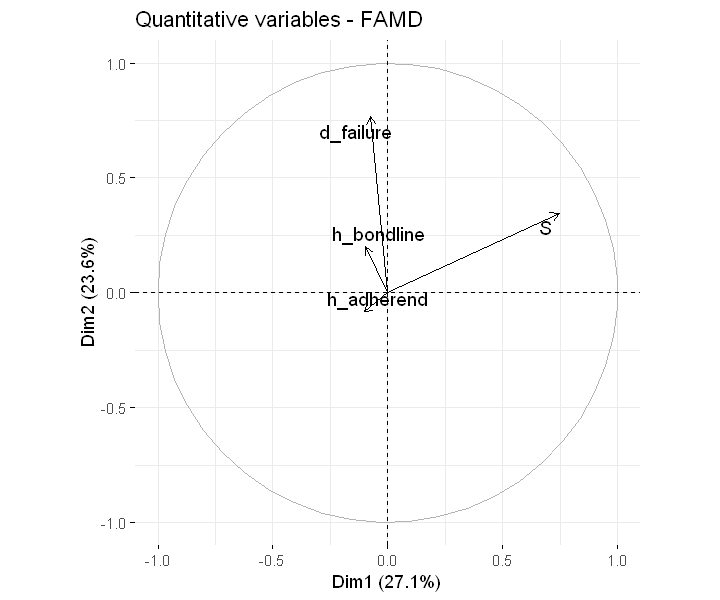

In [110]:
fviz_famd_var(res.famd, "quanti.var", repel = TRUE,
              col.var = "black")

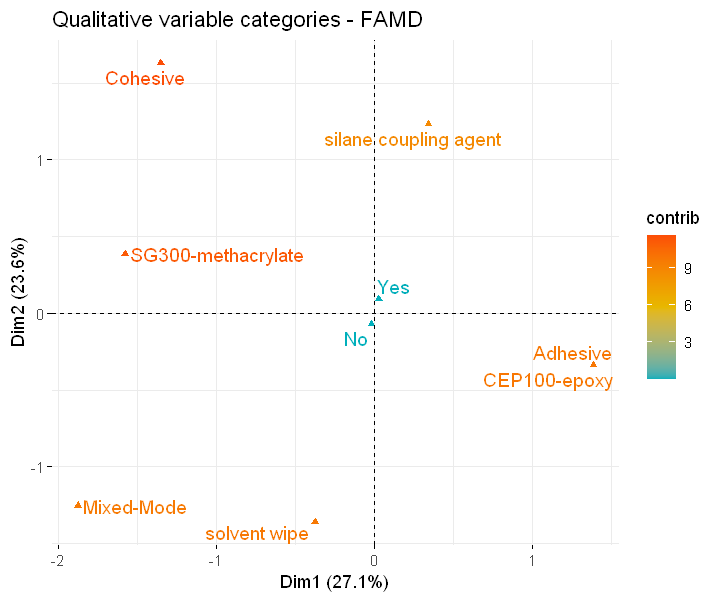

In [111]:
fviz_famd_var(res.famd, choice = "quali.var", col.var = "contrib", repel = TRUE,
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
             )